In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing
from sklearn.decomposition import PCA

matplotlib.style.use('ggplot')

def plotDecisionBoundary(model, X, y):
  fig = plt.figure()
  ax = fig.add_subplot(111)

  padding = 0.6
  resolution = 0.0025
  colors = ['royalblue','forestgreen','ghostwhite']

  # Calculate the boundaries
  x_min, x_max = X[:, 0].min(), X[:, 0].max()
  y_min, y_max = X[:, 1].min(), X[:, 1].max()
  x_range = x_max - x_min
  y_range = y_max - y_min
  x_min -= x_range * padding
  y_min -= y_range * padding
  x_max += x_range * padding
  y_max += y_range * padding

  # Create a 2D Grid Matrix. The values stored in the matrix are the predictions of the class at said location
  xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution), np.arange(y_min, y_max, resolution))

  # What class does the classifier say?
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Plot the contour map
  plt.contourf(xx, yy, Z, cmap=plt.cm.terrain)
  plt.axis('tight')

  # Plot our original points as well...
  for label in range(len(np.unique(y))):
    indices = np.where(y == label)
    plt.scatter(X[indices, 0], X[indices, 1], c=colors[label], label=str(label), alpha=0.8)

  p = model.get_params()
  plt.title('K = ' + str(p['n_neighbors']))
    

In [17]:
# read in dataset
X = pd.read_csv('wheat.csv')
# drop the original wheat_type from the dataset, save the wheat_type into y so it could be use later
y = X.wheat_type
# also drop the 'id' column, since that is not the relevant feature
X.drop(labels = ['id', 'wheat_type'], axis = 1, inplace = True)

# nominal conversion of 'y'
y = y.astype('category').cat.codes

# Fill each row's nan with the mean of the feature
# print x.isnull().sum() has a few missing values
#print X.isnull().sum()

X.compactness.fillna(X.compactness.mean(), inplace = True)
X.width.fillna(X.width.mean(), inplace = True)
X.groove.fillna(X.groove.mean(), inplace = True)

print X.isnull().sum()
print y.isnull().sum()






area           0
perimeter      0
compactness    0
length         0
width          0
asymmetry      0
groove         0
dtype: int64
0


In [18]:
T = preprocessing.normalize(X)
pca = PCA(n_components = 2)
pca_X = pca.fit_transform(T)



In [34]:
# spliting out training and testing data
# INFO: Use 0.33 test size, and use random_state=1. This is important so that your answers are verifiable. In the real world,
# you wouldn't specify a random_state.

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size = 0.33, random_state = 1)

# TODO: Run KNeighborsClassifier. Start out with K=7 neighbors. NOTE: Be sure train your classifier against the PCA transformed
# feature data above! You do not, however, need to transform your labels.

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
plotDecisionBoundary(knn, X_test, y_test)


In [36]:
print knn.score(X_test, y_test)

0.828571428571


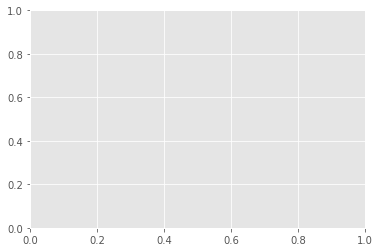

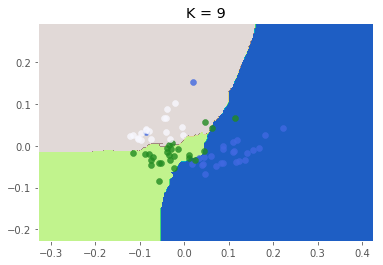

In [30]:
plt.show()